In [65]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

warnings.filterwarnings('ignore')

### 상영관이 많고 다양한 영화를 상영하는 '롯데시네마 월드타워' 데이터 하나만 가지고 EDA

In [2]:
df = pd.read_csv('../01.Data_Collection/Theaters_merged_files/롯데시네마%20월드타워.csv')
df.head()

,상영일자,상영관,1회,2회,3회,4회,5회,6회,7회,8회,9회,10회,11회,12회,13회,14회,15회,16회,17회,좌석수
0,2015-05-09,03관(씨네비즈),"13:00, 노예 12년(디지털), 0원","17:15, 군도: 민란의 시대(디지털), 0원",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,158
1,2015-05-09,04관,"12:45, 오즈의 마법사: 돌아온 도로시(디지털더빙), 0원",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,268
2,2015-05-09,05관(Dolby ATMOS ),"12:30, 비긴 어게인(디지털), 0원","16:30, 쎄시봉(디지털), 0원","20:30, 아메리칸 스나이퍼(디지털), 0원",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,389
3,2015-05-09,06관,"13:15, 모던 타임즈(디지털), 0원","17:15, 토스카(디지털), 0원",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,124
4,2015-05-09,07관,"13:15, 시네마 천국(디지털), 0원","17:30, 엘리노어 릭비: 그 남자(디지털), 0원",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,124


In [3]:
len(df)

29427

In [4]:
df['상영관'].unique()

array(['03관(씨네비즈)', '04관', '05관(Dolby ATMOS )', '06관', '07관', '08관',
       '09관(Dolby ATMOS / 씨네패밀리)', '10관(Dolby ATMOS )', '14관',
       '15관(Dolby ATMOS )', '18관', '19관(수퍼4D)', '20관(Dolby ATMOS )',
       '21관(수퍼플렉스G)', '12관', '13관(수퍼S)', '16관', '17관'], dtype=object)

In [5]:
df.dtypes

상영일자     object
상영관      object
1회       object
2회       object
3회       object
4회       object
5회       object
6회       object
7회       object
8회       object
9회       object
10회      object
11회      object
12회      object
13회      object
14회      object
15회      object
16회     float64
17회      object
좌석수       int64
dtype: object

# 한국영화 상영내역만 남기기

In [6]:
df = df.fillna('00:00, -, 0원')

In [7]:
films = pd.read_csv('../01.Data_Collection/films_updated.csv')
ko_films = list(films['영화명'])

In [8]:
df.iloc[:, 2:-1] = df.iloc[:, 2:-1].astype(str).applymap(lambda x: x if x.split(',')[1].split('(')[0].strip() in ko_films else '-')

In [9]:
showtimes = [''.join(df.iloc[i, 2:-1]) for i in range(len(df))]

In [10]:
df['상영시간'] = showtimes

In [11]:
df.head()

,상영일자,상영관,1회,2회,3회,4회,5회,6회,7회,8회,9회,10회,11회,12회,13회,14회,15회,16회,17회,좌석수,상영시간
0,2015-05-09,03관(씨네비즈),-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,158,-----------------
1,2015-05-09,04관,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,268,-----------------
2,2015-05-09,05관(Dolby ATMOS ),-,"16:30, 쎄시봉(디지털), 0원",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,389,"-16:30, 쎄시봉(디지털), 0원---------------"
3,2015-05-09,06관,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,124,-----------------
4,2015-05-09,07관,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,124,-----------------


In [12]:
drop_idx = []
for i in range(len(df)):
    if df.loc[i, '상영시간'] == '-' * (len(df.columns)-4):
        drop_idx.append(i)
df = df.drop(df.index[drop_idx], axis=0).drop('상영시간', axis=1)

In [13]:
df.sample()

,상영일자,상영관,1회,2회,3회,4회,5회,6회,7회,8회,9회,10회,11회,12회,13회,14회,15회,16회,17회,좌석수
4260,2016-01-01,10관(Dolby ATMOS ),-,-,-,-,"19:45, 조선마술사(디지털), 10,000원",-,-,-,-,-,-,-,-,-,-,-,-,218


In [14]:
len(df)

17117

# 상영 1회당 1개의 행으로 만들기

In [15]:
shows = pd.melt(df, id_vars=['상영일자', '좌석수', '상영관'], value_vars=list(df.columns[2:-1]))
shows= shows[shows['value']!='-'].drop('variable', axis=1)
shows.head()

,상영일자,좌석수,상영관,value
1,2015-05-09,306,08관,"12:15, 조선명탐정 : 사라진 놉의 딸(디지털), 0원"
2,2015-05-09,218,10관(Dolby ATMOS ),"11:45, 파울볼(디지털), 0원"
3,2015-05-10,158,03관(씨네비즈),"13:00, 강남 1970(디지털), 0원"
4,2015-05-10,389,05관(Dolby ATMOS ),"12:30, 오늘의 연애(디지털), 0원"
6,2015-05-10,218,10관(Dolby ATMOS ),"11:45, 약장수(디지털), 0원"


In [16]:
shows['상영시간'] = shows['value'].apply(lambda x: x.split(',')[0].strip())
shows['제목'] = shows['value'].apply(lambda x: x.split(',')[1].split('(')[0].strip())
shows.sample()

,상영일자,좌석수,상영관,value,상영시간,제목
86383,2015-08-10,389,05관(Dolby ATMOS ),"21:55, 암살(디지털), 9,000원",21:55,암살


In [17]:
len(shows)

80547

# 영화별 상영관 규모(좌석수)와 상영시간 비교

In [18]:
scale = pd.DataFrame(shows.groupby(['좌석수','상영시간'])['제목'].value_counts()).rename(columns={'제목':'횟수'})
scale.head(20)

횟수
좌석수 상영시간  제목                       
96  07:00 성실한 나라의 앨리스             2
          인랑                      2
          초행                      1
    07:10 염력                      1
          초행                      1
    07:20 굿바이 마이 러브NK: 붉은 청춘      3
    07:30 성실한 나라의 앨리스             1
          신비아파트: 금빛 도깨비와 비밀의 동굴   1
    07:35 봉이 김선달                  1
          인천상륙작전                  1
    07:40 굿바이 마이 러브NK: 붉은 청춘      1
    07:50 염력                      2
          지금은맞고그때는틀리다             2
          김광석                     1
          나의 연기 워크샵               1
          메리 크리스마스 미스터 모          1
          흥부: 글로 세상을 바꾼 자         1
    07:55 7호실                     1
    08:00 나의 연기 워크샵               4
          B급 며느리                  3

In [19]:
scale = scale.reset_index()
scale.sample()

,좌석수,상영시간,제목,횟수
42752,360,09:40,열정같은소리하고있네,2


In [20]:
scale['상영시간_h'] = scale['상영시간'].apply(lambda x: x.split(':')[0])
scale['좌석수*횟수'] = scale['좌석수'] * scale['횟수']

In [25]:
by_film = scale.groupby(['제목', '상영시간_h'])['좌석수*횟수'].sum().reset_index()
by_film.sample()

,제목,상영시간_h,좌석수*횟수
404,경성학교: 사라진 소녀들,15,1386


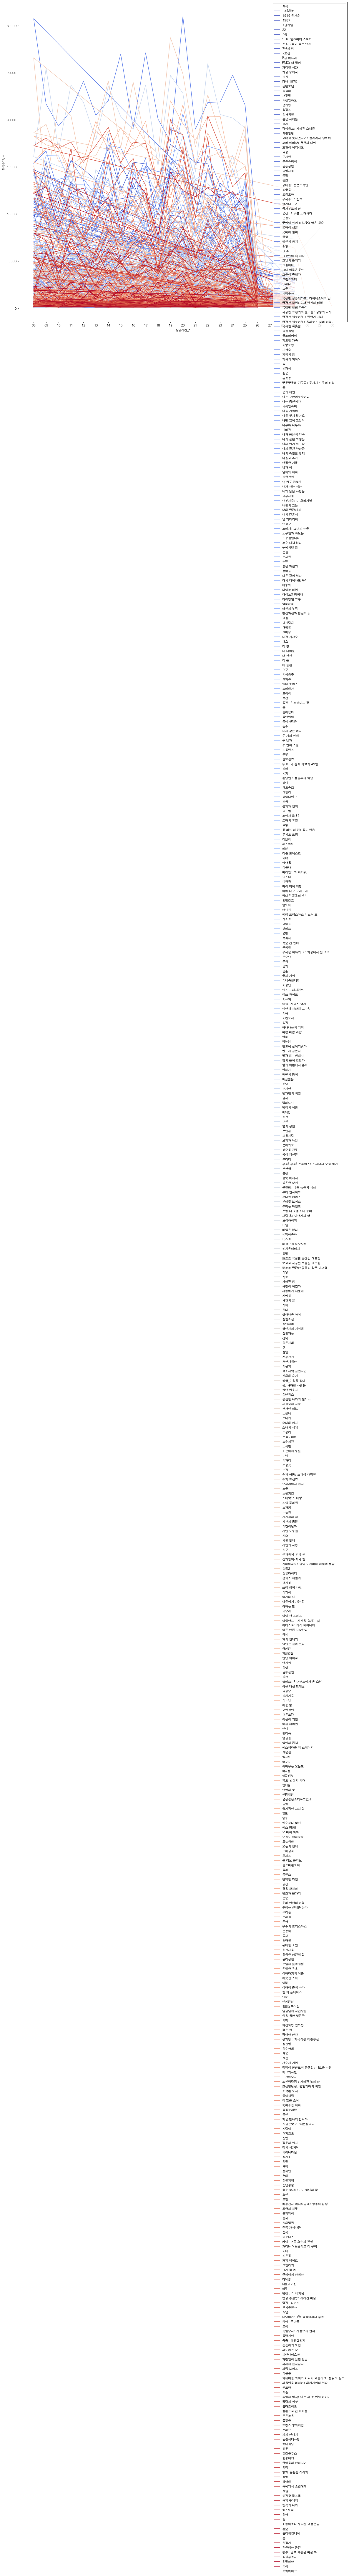

In [26]:
plt.figure(figsize=[20, 20])
sns.lineplot(x='상영시간_h', y='좌석수*횟수', hue='제목', data=by_film, palette='coolwarm')
plt.show()

# '비밀은 없다' 와 '부산행' 비교
비밀은 없다: F-3, 2016-06-23 개봉  
부산행: F-0, 2016-07-20 개봉

In [27]:
films_2 = by_film[by_film['제목'].isin(['비밀은 없다', '부산행'])]
films_2.head()

,제목,상영시간_h,좌석수*횟수
3654,부산행,07,7329
3655,부산행,08,11477
3656,부산행,09,14962
3657,부산행,10,9462
3658,부산행,11,12787


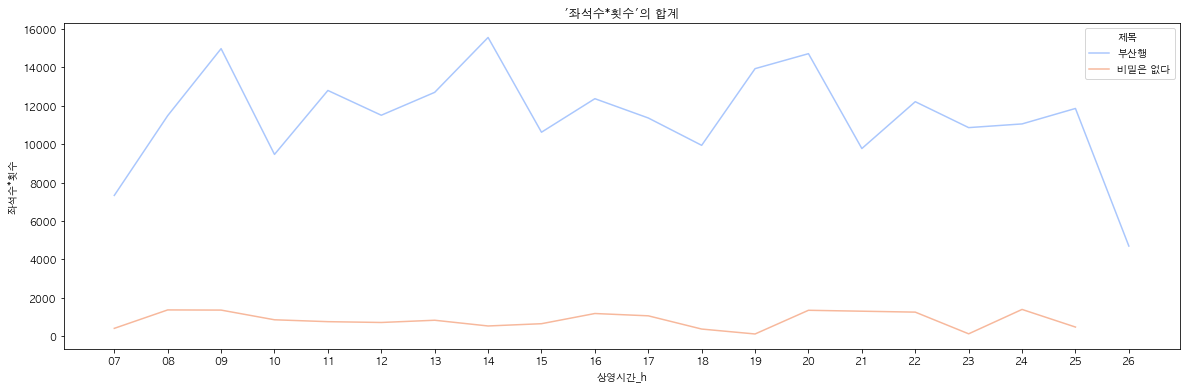

In [28]:
plt.figure(figsize=[20, 6])
plt.title("'좌석수*횟수'의 합계")
sns.lineplot(x='상영시간_h', y='좌석수*횟수', hue='제목', data=films_2, palette='coolwarm')
plt.show()

In [29]:
len(by_film)

7735

In [30]:
by_film['제목'].nunique()

545

# 프라임시간대 '상영횟수*좌석수'로 클러스터링
전체 상영영화 수: 545개  
상영시간: 16~22시

In [31]:
by_film.dtypes

제목        object
상영시간_h    object
좌석수*횟수     int64
dtype: object

In [32]:
by_film['상영시간_h'] = by_film['상영시간_h'].astype(int)

In [33]:
by_film_prime = by_film[(by_film['상영시간_h']>=16) & (by_film['상영시간_h']<=22)]

In [34]:
by_film_prime.head()

,제목,상영시간_h,좌석수*횟수
8,0.0MHz,16,158
9,0.0MHz,17,424
10,0.0MHz,18,292
11,0.0MHz,19,264
12,0.0MHz,20,1779


In [35]:
by_film_prime = by_film_prime.groupby('제목')['좌석수*횟수'].sum().reset_index()

In [72]:
fig = px.histogram(by_film_prime, x="좌석수*횟수")
fig.show()

In [64]:
fig = px.scatter(by_film_prime, x="좌석수*횟수")
fig.show()

In [37]:
by_film_prime.describe()

,좌석수*횟수
count,533.000000
mean,14920.303940
std,25829.341957
min,124.000000
25%,904.000000
50%,2948.000000
75%,15489.000000
max,155809.000000


In [38]:
by_film_prime[by_film_prime['좌석수*횟수']==155809]

,제목,좌석수*횟수
65,극한직업,155809


In [39]:
by_film_prime[by_film_prime['제목']=='비밀은 없다']

,제목,좌석수*횟수
254,비밀은 없다,5376


In [40]:
by_film_prime_min = by_film_prime[by_film_prime['좌석수*횟수']==124]
by_film_prime_min 

,제목,좌석수*횟수
18,걱정말아요,124
113,눈꺼풀,124
139,델타 보이즈,124
220,밤치기,124
309,스타박'스 다방,124
472,타클라마칸,124
518,행복의 나라,124


In [41]:
by_film_prime_min = by_film_prime_min.merge(films[['영화명', 'F-rated']], how='left', left_on='제목', right_on='영화명')

In [42]:
by_film_prime_min 

,제목,좌석수*횟수,영화명,F-rated
0,걱정말아요,124,걱정말아요,0
1,눈꺼풀,124,눈꺼풀,0
2,델타 보이즈,124,델타 보이즈,0
3,밤치기,124,밤치기,3
4,스타박'스 다방,124,스타박'스 다방,0
5,타클라마칸,124,타클라마칸,0
6,행복의 나라,124,행복의 나라,0


In [43]:
by_film_prime_75 = by_film_prime[by_film_prime['좌석수*횟수']<=15489]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xe20dbf208>]],
      dtype=object)

<Figure size 1440x432 with 0 Axes>

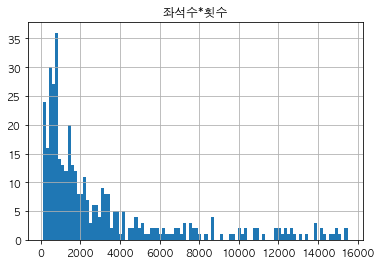

In [44]:
plt.figure(figsize=[20,6])
by_film_prime_75.hist(bins=100)

In [45]:
len(by_film_prime_75)

400

In [46]:
by_film_prime_75.describe()

,좌석수*횟수
count,400.000000
mean,3142.707500
std,3657.566287
min,124.000000
25%,744.000000
50%,1618.000000
75%,3750.750000
max,15489.000000


In [66]:
by_film_prime_1000 = by_film_prime_75[by_film_prime_75['좌석수*횟수']<=1000]

In [70]:
len(by_film_prime_1000)

143

In [67]:
fig = px.scatter(by_film_prime_1000, x="좌석수*횟수")
fig.show()

In [52]:
by_film_prime_16 = by_film_prime_75[by_film_prime_75['좌석수*횟수']<=1000]

250

In [71]:
by_film_prime_2000 = by_film_prime[by_film_prime['좌석수*횟수']<=2000]

fig = px.scatter(by_film_prime_2000, x="좌석수*횟수")
fig.show()

개봉 첫 주의 스크린수, 스크린점유율, 좌석점유율 참고

상영시간 등급 (CGV 기준) 
* 모닝 06:00 ~ 10:00 -> 4등
* 브런치 10:01 ~ 13:00 -> 3등
* 데이라이트 13:01 ~ 16:00 -> 2등
* 프라임 16:01 ~ 22:00 -> 1등
* 문라이트 22:01 ~ 24:00 -> 3등
* 나이트 24:01 ~ 05:59 -> 4등